<a href="https://colab.research.google.com/github/christianbammann/introtoML/blob/main/homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Problem 1**

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from google.colab import drive

# use seaborn plotting defaults
import seaborn as sns; sns.set()

drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd

In [7]:
cdata = load_breast_cancer()

In [34]:
df = pd.DataFrame(cdata.data, columns=cdata.feature_names)
df['target'] = cdata.target
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [16]:
X = df.iloc[:, 0:30].values
Y = df.iloc[:, 30].values

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.20, random_state=0, stratify=Y
)

print("Training samples:", X_train.shape[0])
print("Test samples    :", X_test.shape[0])
print("Positive rate (train):", Y_train.mean())
print("Positive rate (test) :", Y_test.mean())

Training samples: 455
Test samples    : 114
Positive rate (train): 0.6263736263736264
Positive rate (test) : 0.631578947368421


In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
svm_linear = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", SVC(kernel="linear", C=1.0))
])

svm_linear.fit(X_train, Y_train)
y_pred = svm_linear.predict(X_test)

In [50]:
acc = accuracy_score(Y_test, y_pred)
pre = precision_score(Y_test, y_pred)
rec = recall_score(Y_test, y_pred)

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("F1 Score:", metrics.f1_score(Y_test, Y_pred))

Accuracy: 0.956140350877193
Precision: 0.9466666666666667
Recall: 0.9861111111111112
F1 Score: 0.9659863945578231


In [55]:
cnf_matrix = confusion_matrix(Y_test, y_pred)
cnf_matrix

array([[40,  2],
       [ 0, 72]])

Text(0.5, 427.9555555555555, 'Predicted Label')

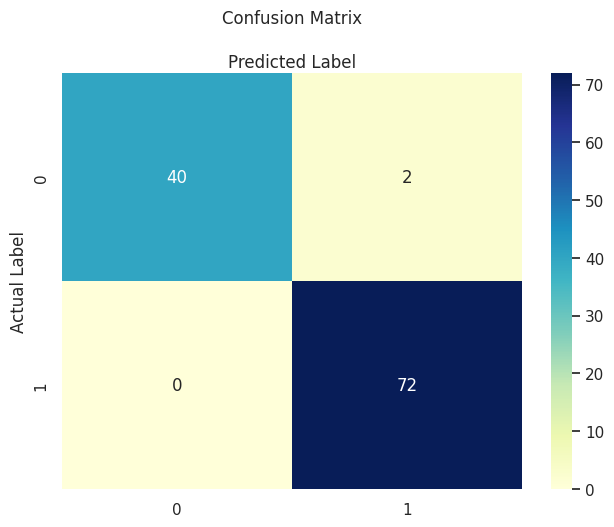

In [57]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [58]:
kernels = ["linear", "rbf", "poly", "sigmoid"]
results = []

for k in kernels:
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("svm", SVC(kernel=k, C=1.0, gamma="scale"))
    ])
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    acc = metrics.accuracy_score(Y_test, Y_pred)
    pre = metrics.precision_score(Y_test, Y_pred)
    rec = metrics.recall_score(Y_test, Y_pred)

    results.append({"Kernel": k, "Accuracy": acc, "Precision": pre, "Recall": rec})

df_results = pd.DataFrame(results)
print(df_results)

    Kernel  Accuracy  Precision    Recall
0   linear  0.982456   0.972973  1.000000
1      rbf  0.964912   0.972222  0.972222
2     poly  0.921053   0.888889  1.000000
3  sigmoid  0.964912   0.959459  0.986111


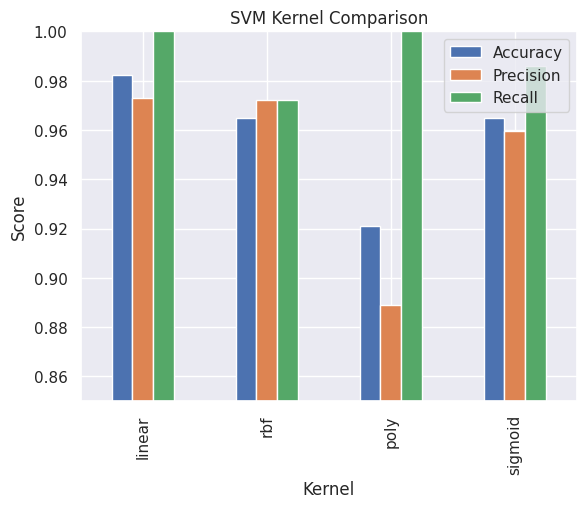

In [59]:
df_results.plot(x="Kernel", y=["Accuracy","Precision","Recall"], kind="bar")
plt.title("SVM Kernel Comparison")
plt.ylabel("Score")
plt.ylim(0.85,1.0)
plt.show()

### **Problem 2**

In [91]:
hdf = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Housing.csv')

In [92]:
hdf.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [93]:
feat_cols = ["area","bedrooms","bathrooms","stories",
             "mainroad","guestroom","basement",
             "hotwaterheating","airconditioning","parking","prefarea"]
target_col = "price"

In [94]:
bin_cols = ["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"]
for c in bin_cols:
    if hdf[c].dtype == object:
        hdf[c] = hdf[c].str.lower().map({"yes":1, "no":0})

X = hdf[feat_cols].values.astype(float)
y = hdf[target_col].values.astype(float)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Sample features row:\n", X[0])

Shape of X: (545, 11)
Shape of y: (545,)
Sample features row:
 [7.42e+03 4.00e+00 2.00e+00 3.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00
 1.00e+00 2.00e+00 1.00e+00]


In [95]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

In [96]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)
print("Training samples:", X_train.shape[0])
print("Test samples    :", X_test.shape[0])
print("Positive rate (train):", Y_train.mean())
print("Positive rate (test) :", Y_test.mean())

Training samples: 436
Test samples    : 109
Positive rate (train): 0.6263736263736264
Positive rate (test) : 0.631578947368421


In [97]:
from sklearn.svm import SVR
svr_linear = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR(kernel="linear", C=1.0, epsilon=0.1))
])

svr_linear.fit(X_train, y_train)
y_pred = svr_linear.predict(X_test)

In [98]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2   = r2_score(y_test, y_pred)
mae  = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

print(f"SVR (linear) — R²: {r2:.4f} | MAE: {mae:.2f} | RMSE: {rmse:.2f}")

SVR (linear) — R²: 0.6185 | MAE: 0.53 | RMSE: 0.55


In [99]:
y_true = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()
y_pred = scaler_y.inverse_transform(svr_linear.predict(X_test).reshape(-1, 1)).ravel()


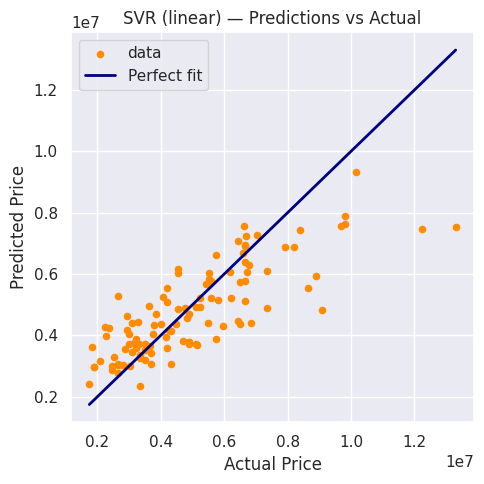

In [100]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(y_true, y_pred, color='darkorange', s=20, label='data')
lims = [min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max())]
plt.plot(lims, lims, 'navy', lw=2, label='Perfect fit')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('SVR (linear) — Predictions vs Actual')
plt.legend()
plt.tight_layout()
plt.show()

In [101]:
kernels = ["linear", "rbf", "poly", "sigmoid"]
results = []

for k in kernels:
    svr = SVR(kernel=k, C=1.0, epsilon=0.1, gamma="scale")
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)

    results.append({"Kernel": k, "R²": r2, "MAE": mae, "RMSE": rmse})

df_results = pd.DataFrame(results)
print(df_results)

    Kernel        R²       MAE      RMSE
0   linear  0.618428  0.534047  0.552294
1      rbf  0.599175  0.559573  0.580162
2     poly  0.555170  0.576487  0.643856
3  sigmoid -1.884952  1.355604  4.175736


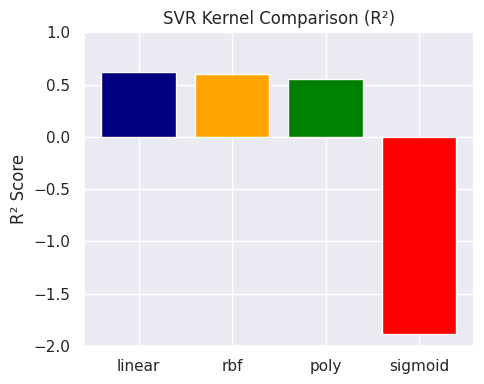

In [104]:
plt.figure(figsize=(5,4))
plt.bar(df_results["Kernel"], df_results["R²"], color=['navy','orange','green','red'])
plt.title("SVR Kernel Comparison (R²)")
plt.ylabel("R² Score")
plt.ylim(-2, 1)
plt.tight_layout()
plt.show()

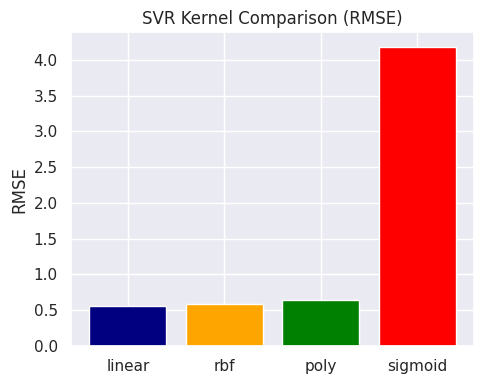

In [105]:
plt.figure(figsize=(5,4))
plt.bar(df_results["Kernel"], df_results["RMSE"], color=['navy','orange','green','red'])
plt.title("SVR Kernel Comparison (RMSE)")
plt.ylabel("RMSE")
plt.tight_layout()
plt.show()